In [1]:
import os,sys
import numpy as np
import scipy.stats as st
import math
import random as rand
import matplotlib.pyplot as plt
import glob
import pandas as pd
import scipy.stats as st
from matplotlib import rcParams
from matplotlib import ticker as mticker

In [2]:
data_directory = './half-lives'
os.chdir(data_directory)

wf = open('all-species_decay.csv','w')

print('Species,Median,Var,95C,5C',file=wf)
wf.close()

(4108,) (908,)


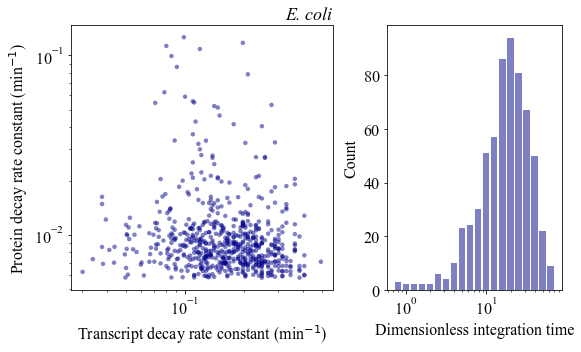

In [3]:
dataset_m = pd.read_csv('coli-mrna-half-life.csv')
dataset_p = pd.read_csv('coli-protein-half-life.csv')

gene_m = dataset_m['Gene'].to_list()
gene_p = dataset_p['Gene'].to_list()

data_m = dataset_m['Half-life (h)'].to_numpy()
data_p = dataset_p['Half-life (h)'].to_numpy()

#data_m = pd.read_csv('coli-mrna-half-life.csv').to_numpy()[:,1]
#data_p = pd.read_csv('protein-half-life.csv').to_numpy()[:,1]

print(data_m.shape,data_p.shape)

T_samples = []
pair_m, pair_p = [], []


for i in range(0,len(gene_m)):
    m = gene_m[i]
    
    if m in gene_p:
        ii = gene_p.index(m)
        
        if float(data_m[i])>0.0:
            r_p = 1.0/float(data_p[ii]) + 1.0/2.0
            r_p = 1.0/r_p
            r_m = float(data_m[i])
            
            pair_p.append(0.693/(r_p*60))
            pair_m.append(0.693/(r_m*60))
            
            T_samples.append(r_p/float(data_m[i]))

Ts = np.array(T_samples)
minT = np.min(Ts)
maxT = np.max(Ts)

coli_Ts = np.array(T_samples)

bin_e = 10**np.linspace(math.log10(minT),math.log10(maxT),21)

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(8,5),gridspec_kw={'width_ratios':[1.5,1]})
ax1.scatter(np.array(pair_m),np.array(pair_p),color='darkblue',s=20,alpha=0.5,edgecolor='None')
ax1.set_xlabel(r'Transcript decay rate constant (min$^{-1}$)',size=16)
ax1.set_ylabel(r'Protein decay rate constant (min$^{-1}$)',size=16)
ax1.tick_params(axis='both',labelsize=16)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.hist(Ts,bins=bin_e,rwidth=0.8,color='darkblue',alpha=0.5)
ax2.set_xscale('log')
ax2.tick_params(axis='both',labelsize=16)
ax2.set_xlabel('Dimensionless integration time',size=16)
ax2.set_ylabel('Count',size=16)

ax1.set_title('E. coli',style='italic',size=18,loc='right')
plt.tight_layout()
plt.savefig('coli_decay.png',dpi=300)

outstring = 'Coli,'+str(np.median(Ts))+','+str(np.var(Ts))+','+str(np.percentile(Ts,95))+','+str(np.percentile(Ts,5))

print(outstring,file=open('all-species_decay.csv','a'))

(5654,) (3751,)


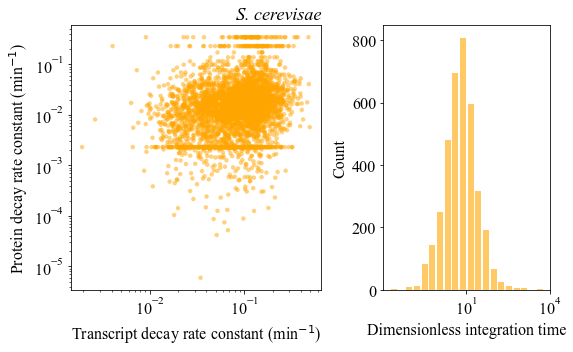

In [4]:
dataset_m = pd.read_csv('cerevisae-mrna-half-life.csv')
dataset_p = pd.read_csv('cerevisae-protein-half-life.csv')

gene_m = dataset_m['Gene'].to_list()
gene_p = dataset_p['Gene'].to_list()

data_m = dataset_m['Half-life (h)'].to_numpy()
data_p = dataset_p['Half-life (h)'].to_numpy()

print(data_m.shape,data_p.shape)

T_samples = []
pair_m, pair_p = [], []

for i in range(0,len(gene_m)):
    m = gene_m[i]
    
    if m in gene_p:
        ii = gene_p.index(m)
        
        pair_p.append(0.693/(data_p[ii]*60))
        pair_m.append(0.693/(data_m[i]*60))
        
        T_samples.append(float(data_p[ii])/float(data_m[i]))
              
Ts = np.array(T_samples)
minT = np.min(Ts)
maxT = np.max(Ts)

yeast_Ts = np.array(T_samples)

bin_e = 10**np.linspace(math.log10(minT),math.log10(maxT),21)

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(8,5),gridspec_kw={'width_ratios':[1.5,1]})
ax1.scatter(np.array(pair_m),np.array(pair_p),color='orange',s=20,alpha=0.5,edgecolor='None')
ax1.set_xlabel(r'Transcript decay rate constant (min$^{-1}$)',size=16)
ax1.set_ylabel(r'Protein decay rate constant (min$^{-1}$)',size=16)
ax1.tick_params(axis='both',labelsize=16)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_title('S. cerevisae',style='italic',size=18,loc='right')

ax2.hist(Ts,bins=bin_e,rwidth=0.8,color='orange',alpha=0.6)
ax2.set_xscale('log')
ax2.tick_params(axis='both',labelsize=16)
ax2.set_xlabel('Dimensionless integration time',size=16)
ax2.set_ylabel('Count',size=16)

plt.tight_layout()
plt.savefig('yeast_decay.png',dpi=300)

outstring = 'Yeast,'+str(np.median(Ts))+','+str(np.var(Ts))+','+str(np.percentile(Ts,95))+','+str(np.percentile(Ts,5))

print(outstring,file=open('all-species_decay.csv','a'))

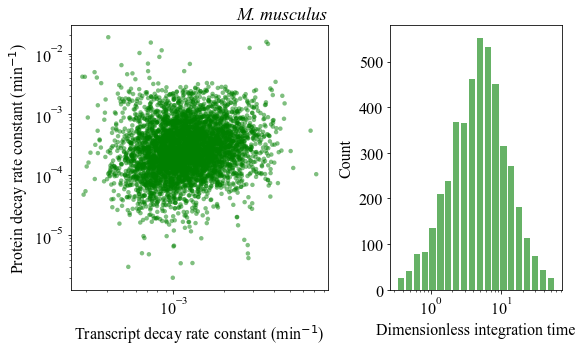

In [5]:
data = pd.read_csv('mouse_mrna_protein_half_lives.csv')

T_samples = []
pair_m, pair_p = [], []

for p,m in zip(data['Protein'],data['mRNA']):
    if math.isnan(m) or math.isnan(p):
        pass
    else:
        T_samples.append(float(p)/float(m))
        
        pair_p.append(0.693/(p*60))
        pair_m.append(0.693/(m*60))
        
Ts = np.array(T_samples)
minT = np.percentile(Ts,1)
maxT = np.percentile(Ts,99)

mouse_Ts = np.array(T_samples)

bin_e = 10**np.linspace(math.log10(minT),math.log10(maxT),21)

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(8,5),gridspec_kw={'width_ratios':[1.5,1]})
ax1.scatter(np.array(pair_m),np.array(pair_p),color='green',s=20,alpha=0.5,edgecolor='None')
ax1.set_xlabel(r'Transcript decay rate constant (min$^{-1}$)',size=16)
ax1.set_ylabel(r'Protein decay rate constant (min$^{-1}$)',size=16)
ax1.tick_params(axis='both',labelsize=16)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_title('M. musculus',style='italic',size=18,loc='right')

ax2.hist(Ts,bins=bin_e,rwidth=0.8,color='green',alpha=0.6)
ax2.set_xscale('log')
ax2.tick_params(axis='both',labelsize=16)
ax2.set_xlabel('Dimensionless integration time',size=16)
ax2.set_ylabel('Count',size=16)

plt.tight_layout()
plt.savefig('mouse_decay.png',dpi=300)

outstring = 'Mouse,'+str(np.median(Ts))+','+str(np.var(Ts))+','+str(np.percentile(Ts,95))+','+str(np.percentile(Ts,5))

print(outstring,file=open('all-species_decay.csv','a'))

(8342,) (4106,)
(4986,)


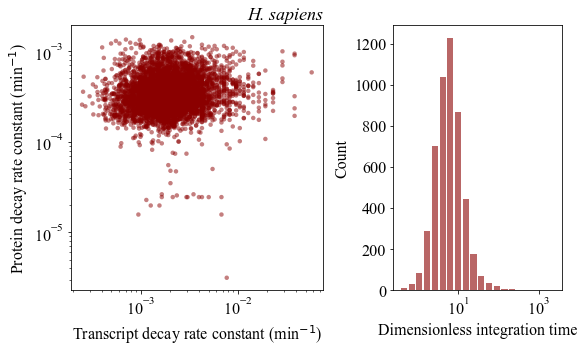

In [6]:
dataset_m = pd.read_csv('sapiens-mrna-half-life.csv')
dataset_p = pd.read_csv('sapiens-protein-half-life.csv')

gene_m = dataset_m['Gene'].to_list()
gene_p = dataset_p['Gene'].to_list()

data_m = dataset_m['Half-life (h)'].to_numpy()
data_p = dataset_p['Half-life (h)'].to_numpy()

print(data_m.shape,data_p.shape)

T_samples = []
pair_m, pair_p = [], []

for i in range(0,len(gene_m)):
    if float(data_m[i])>0.0:
            
        m = gene_m[i]
    
        for j in range(0,len(gene_p)):
            p = gene_p[j]
            
            if type(p) is str:
                if m in p:
                    T_samples.append(float(data_p[j])/float(data_m[i]))
                    pair_p.append(0.693/(data_p[j]*60))
                    pair_m.append(0.693/(data_m[i]*60))

Ts = np.array(T_samples)
minT = np.min(Ts)
maxT = np.max(Ts)

human_Ts = np.array(T_samples)

print(Ts.shape)

bin_e = 10**np.linspace(math.log10(minT),math.log10(maxT),21)

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(8,5),gridspec_kw={'width_ratios':[1.5,1]})
ax1.scatter(np.array(pair_m),np.array(pair_p),color='darkred',s=20,alpha=0.5,edgecolor='None')
ax1.set_xlabel(r'Transcript decay rate constant (min$^{-1}$)',size=16)
ax1.set_ylabel(r'Protein decay rate constant (min$^{-1}$)',size=16)
ax1.tick_params(axis='both',labelsize=16)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_title('H. sapiens',style='italic',size=18,loc='right')

ax2.hist(Ts,bins=bin_e,rwidth=0.8,color='darkred',alpha=0.6)
ax2.set_xscale('log')
ax2.tick_params(axis='both',labelsize=16)
ax2.set_xlabel('Dimensionless integration time',size=16)
ax2.set_ylabel('Count',size=16)

plt.tight_layout()
plt.savefig('human_decay.png',dpi=300)

outstring = 'Sapiens,'+str(np.median(Ts))+','+str(np.var(Ts))+','+str(np.percentile(Ts,95))+','+str(np.percentile(Ts,5))

print(outstring,file=open('all-species_decay.csv','a'))

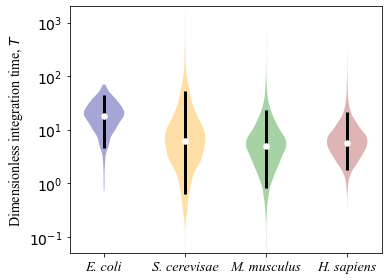

In [7]:
data_set = [np.log10(coli_Ts), np.log10(yeast_Ts), np.log10(mouse_Ts), np.log10(human_Ts)]

medians = []
q95, q5 = [], []

for d in data_set:
    medians.append(np.median(d))
    q95.append(np.percentile(d,95))
    q5.append(np.percentile(d,5))
    
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

# Create a figure instance
fig, ax = plt.subplots(figsize=(5.5,4))

# Create an axes instance
#ax = fig.add_axes([0,0,1,1])

# Create the boxplot
parts = ax.violinplot(data_set,showmeans=False,showmedians=False,showextrema=False)

cs = ['darkblue','orange','green','brown']
kk = 0

for vp in parts['bodies']:
    vp.set_facecolor(cs[kk])
    #vp.set_edgecolor(rrred)
    #vp.set_linewidth(1)
    vp.set_alpha(0.35)
    kk += 1

inds = np.arange(1, len(medians) + 1)
ax.vlines(inds, q95, q5, color='k', linestyle='-', lw=3)
ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)


labels = ['E. coli', 'S. cerevisae', 'M. musculus', 'H. sapiens']
y_labels = [0.01,0.1,1,10,100,1000]

ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels,fontsize=14,style='italic')

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))

#ax.set_yticks(np.arange(0, len(y_labels)))
#ax.set_yticklabels(y_labels,fontsize=14)

#plt.xlabel('Species',size=18)
plt.ylabel(r'Dimensionless integration time, $T$',size=14)
plt.ylim(math.log10(0.05),math.log10(2000))
plt.yticks(fontsize=14)
#plt.xlabel('',size=18)
plt.tight_layout()

data_dir = '/Users/sns9/CodeX/InCens/half-lives/'
plt.savefig(data_dir+'SpeciesIntegrationTimes.png',dpi=300)